In [5]:
from corespray import corespraydf
from galpy.potential import MWPotential2014
from galpy.util import conversion
from galpy.orbit import Orbit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import seaborn as sns

from IPython.display import HTML
%matplotlib inline

In [6]:
ro,vo=8.,220.
to=conversion.time_in_Gyr(ro=ro,vo=vo)*1000.


In [7]:
#Globular Cluster NGC 6397
gcname='NGC6397'
rmfrac=0.8
mu0=0.
sig0=5.3
vesc0=21.1
logrho0=6.41
rho0=10.0**6.41

mgc=1.0e5
rgc=3.
W0=5.

mmin=0.1
mmax=1.4
alpha=-1

In [8]:
cspray=corespraydf(gcname,MWPotential2014,mu0,sig0,vesc0,rho0,mgc,rgc,W0,mmin,mmax,alpha)

In [9]:
os=cspray.sample(1000,0,nstar=1000)

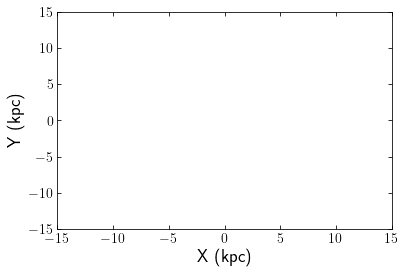

In [10]:
cspray.animate(frames=100,interval=50,xlim=(-15,15),ylim=(-15,15))

In [11]:
HTML(cspray.anim.to_jshtml())


In [12]:
cspray.snapout()

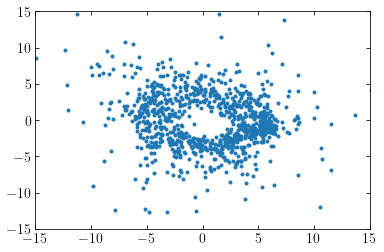

In [16]:
plt.plot(os.x(),os.y(),'.')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()
plt.close()

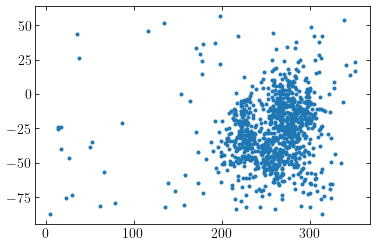

In [17]:
plt.plot(os.ra(),os.dec(),'.')
plt.show()
plt.close()

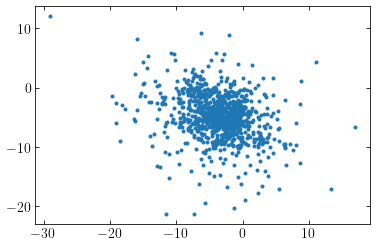

In [18]:
plt.plot(os.pmra(),os.pmdec(),'.')
plt.show()
plt.close()

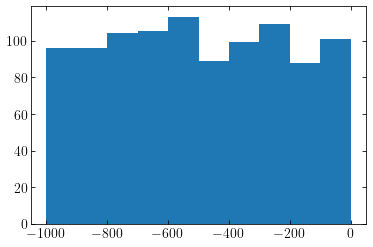

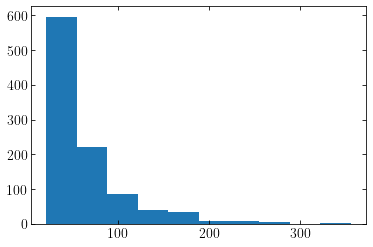

In [19]:
plt.hist(cspray.tesc)
plt.show()
plt.close()

plt.hist(cspray.vesc)
plt.show()
plt.close()

In [20]:
ts=np.linspace(0,1,1000)
os.integrate(ts,MWPotential2014)
jr,jp,jz=os.jr(),os.jp(),os.jz()

In [21]:
vindx=cspray.vesc<500

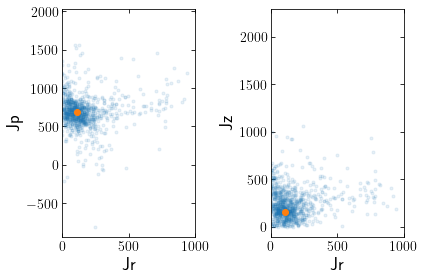

In [22]:
plt.subplot(1,2,1)

plt.plot(jr[vindx],jp[vindx],'.',alpha=0.1)
plt.plot(cspray.o.jr(),cspray.o.jp(),'o')

plt.xlabel('Jr')
plt.ylabel('Jp')
plt.xlim(0,1000)

plt.subplot(1,2,2)

plt.plot(jr[vindx],jz[vindx],'.',alpha=0.1)
plt.plot(cspray.o.jr(),cspray.o.jz(),'o')

plt.xlabel('Jr')
plt.ylabel('Jz')

plt.xlim(0,1000)

plt.tight_layout()

plt.show()
plt.close()